In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
import matplotlib.pyplot as plt

D:\python3_venvs\lab\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
from cmprs.rounding import StochasticRounding, round_nearest_transform

In [4]:
N = 10_000 # number of repeats for each value
NUM_POINTS = 1_001 # number of values taken in range

In [5]:
sr = StochasticRounding(seed=42)
sd = StochasticRounding(subtractive=True, seed=42)

In [6]:
x = torch.linspace(-2, 2, NUM_POINTS)

In [7]:
repeated_x = x.repeat((N, 1))

In [10]:
res_sr = sr.roundtrip(repeated_x).rx

In [11]:
res_sd = sd.roundtrip(repeated_x).rx

In [12]:
res_round = round_nearest_transform.roundtrip(repeated_x).rx

In [13]:
n_vec = torch.arange(1, N + 1).reshape((-1, 1))

In [14]:
def cum_rmse(x1, x2):
    return torch.sqrt(torch.cumsum((x1 - x2)**2, dim=0) / n_vec)

cum_rmse_sr = cum_rmse(res_sr, x)
cum_rmse_sd = cum_rmse(res_sd, x)
cum_rmse_round = cum_rmse(res_round, x)

In [15]:
def plot_rmse(n):
    plt.title(f'{n=}')
    plt.plot(x, cum_rmse_sr[n - 1, :], label='Stochastic rounding')
    plt.plot(x, cum_rmse_sd[n - 1, :], label='Substractive dithering')
    plt.plot(x, cum_rmse_round[n - 1, :], label='Round')
    plt.ylabel('RMSE')
    plt.xlabel('x')
    plt.legend()

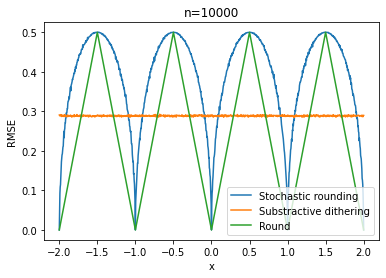

In [16]:
plot_rmse(N) 

In [17]:
def cum_bias(x1, x2):
    # aka mean signed deviation
    return torch.cumsum((x1 - x2), axis=0) / n_vec

cum_bias_sr = cum_bias(res_sr, x)
cum_bias_sd = cum_bias(res_sd, x)
cum_bias_round = cum_bias(res_round, x)

In [18]:
def plot_bias(n):
    plt.title(f'{n=}')
    plt.plot(x, cum_bias_sr[n - 1, :], label='Stochastic rounding')
    plt.plot(x, cum_bias_sd[n - 1, :], label='Substractive dithering')
    plt.plot(x, cum_bias_round[n - 1, :], label='Round')
    plt.ylabel('Bias (mean deviation)')
    plt.xlabel('x')
    plt.legend()

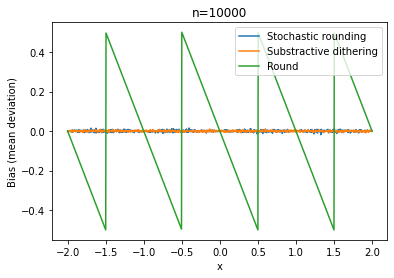

In [19]:
plot_bias(N)